In [148]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
import seaborn as sns

# Tree-Based Methods

In [8]:
hitters = pd.read_csv("Hitters.csv")
hitters.dropna(axis="rows", inplace=True)
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


Text(20, 50, 'R2')

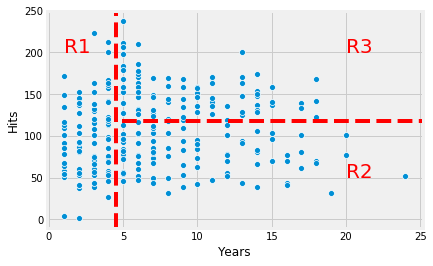

In [29]:
fig, ax = plt.subplots()

sns.scatterplot(x="Years",y="Hits",data=hitters, ax=ax)
ax.axvline(4.5, ls="--", color="red")
ax.axhline(y = 117.5, xmin = 0.2, xmax = 1, ls="--", color="red")
ax.text(1.0,200, "R1", fontsize = 20, color="red")
ax.text(20,200, "R3", fontsize = 20, color="red")
ax.text(20,50, "R2", fontsize = 20, color="red")

In [63]:
R1 = (hitters
      .assign(logSalary = np.log(hitters["Salary"]))
      .query('Years < 4.5')
      .filter(["logSalary"])
      .mean()
     )

R2 = (hitters
      .assign(logSalary = np.log(hitters["Salary"]))
      .query('Years > 4.5 & Hits < 117.5')
      .filter(["logSalary"])
      .mean()
     )

R3 = (hitters
      .assign(logSalary = np.log(hitters["Salary"]))
      .query('Years > 4.5 & Hits > 117.5')
      .filter(["logSalary"])
      .mean()
     )

print("R1 {0:.6}$, R2 {1:.6}$, R3 {2:.6}$".format(np.exp(R1[0]),np.exp(R2[0]),np.exp(R3[0])))

R1 165.139$, R2 402.776$, R3 845.296$


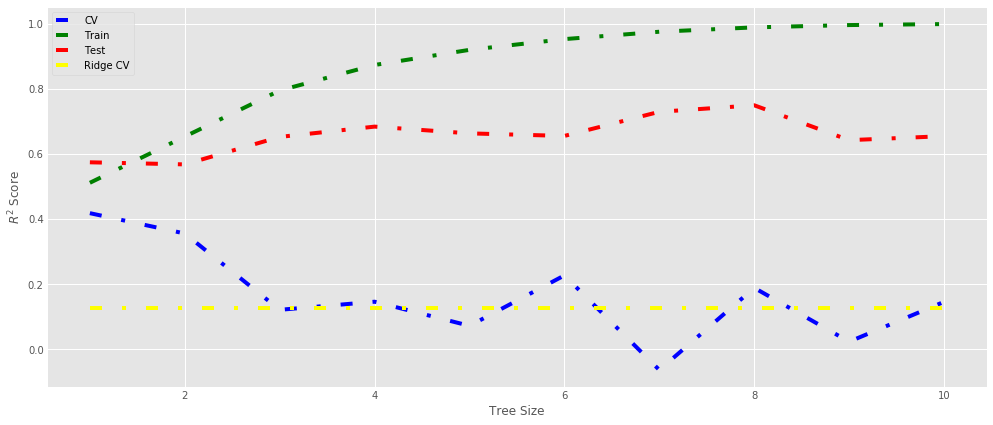

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = hitters.drop(["Salary","NewLeague","Division","League"], axis="columns")
Y = np.log(hitters["Salary"])

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.5)

train_score = []
test_score = []
cv_score = []
ridge_score = []

trees = list(range(1,11))

for tree_size in trees:
    clf = DecisionTreeRegressor(max_depth = tree_size)
    clf_reg = Ridge(alpha=0.5)
    
    cv_score.append(np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring = 'r2')))
    
    clf_train = clf.fit(X_train,y_train)
    train_err = r2_score(y_train,clf_train.predict(X_train))
    train_score.append(np.mean(train_err))
    
    clf_test = clf.fit(X_train,y_train)
    test_err = r2_score(y_test,clf_train.predict(X_test))
    test_score.append(np.mean(test_err))
    
    ridge_score.append(np.mean(cross_val_score(clf_reg,X_train,y_train, cv=5, scoring="r2")))
    
    
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(trees,cv_score, linestyle=(0,(3,5,1,5)),color="blue")
ax.plot(trees,train_score, linestyle=(0,(3,5,1,5)),color="green")
ax.plot(trees,test_score, linestyle=(0,(3,5,1,5)),color="red")
ax.plot(trees,ridge_score, linestyle=(0,(3,5,1,5)),color="yellow")
ax.set_xlabel("Tree Size")
ax.set_ylabel("$R^2$ Score")
ax.legend(labels=["CV","Train","Test","Ridge CV"])
    

In [169]:
heart = pd.read_csv("Heart.csv")
heart.drop("Unnamed: 0", axis="columns", inplace=True)
heart.dropna(axis="rows" , inplace=True)
heart.info()
print(heart.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB
   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import f1_score

encoder = LabelEncoder()
heart["CP_enc"] = encoder.fit_transform(heart["ChestPain"])
heart["Thal_enc"] = encoder.fit_transform(heart["Thal"])

clf = DecisionTreeClassifier()
clf_temp = clf.fit(X,Y)
X = heart.drop(["AHD","ChestPain","Thal"], axis="columns")
Y = heart["AHD"]

p = cross_validate(clf,X,Y,cv=10,scoring="accuracy", return_train_score=True)
print(np.mean(p["test_score"]))

0.726896551724138


### Bagging, Random Forest, Boosting

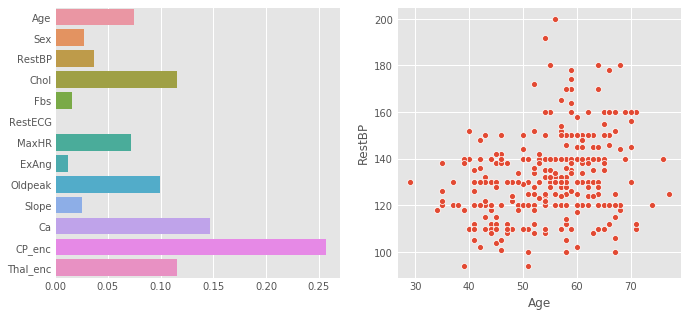

In [219]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x=clf_temp.feature_importances_,y=X.columns, ax=ax1)
sns.scatterplot(x=X["Age"], y=X["RestBP"])

## Random forests

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import f1_score

encoder = LabelEncoder()
heart["CP_enc"] = encoder.fit_transform(heart["ChestPain"])
heart["Thal_enc"] = encoder.fit_transform(heart["Thal"])
X = heart.drop(["AHD","ChestPain","Thal"], axis="columns")
Y = heart["AHD"]


clf = [DecisionTreeClassifier(), RandomForestClassifier(max_features=13), RandomForestClassifier(max_features=6), RandomForestClassifier(max_features=4)]
scores = []

for classifier in clf:
    p = cross_validate(classifier,X,Y,cv=10,scoring="accuracy", return_train_score=True)
    scores.append(np.mean(p["test_score"]))
    
print("Decision Tree accuracy: {0:.4}, \nBagging accuracy: {1:.4}, \nRandomForest p/2 accuracy: {2:.4}, \nRandomForest sqrt(p) accuracy: {3:.4}".format(scores[0],scores[1],scores[2], scores[3]))

Decision Tree accuracy: 0.7272, 
Bagging accuracy: 0.8013, 
RandomForest p/2 accuracy: 0.8046, 
RandomForest sqrt(p) accuracy: 0.8147


## Boosting

In [254]:
from sklearn.ensemble import GradientBoostingClassifier

# we just use the scores list from previously
clf = GradientBoostingClassifier()
p = cross_validate(clf,X,Y,cv=10,scoring="accuracy", return_train_score=True)
scores.append(np.mean(p["test_score"]))

print("Decision Tree accuracy: {0:.4}, \nBagging accuracy: {1:.4}, \nRandomForest p/2 accuracy: {2:.4}, \nRandomForest sqrt(p) accuracy: {3:.4}, \nGradientBoosting Tree accuracy: {4:.4}".format(scores[0],scores[1],scores[2], scores[3], scores[4]))

Decision Tree accuracy: 0.7272, 
Bagging accuracy: 0.8013, 
RandomForest p/2 accuracy: 0.8046, 
RandomForest sqrt(p) accuracy: 0.8147, 
GradientBoosting Tree accuracy: 0.8113
